<a href="https://colab.research.google.com/github/JavohirTF7/Deep-learning-/blob/main/MNIST_Converting_image_data_into_digital_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import fastai
import numpy as np
import pandas as pd

In [2]:
from fastai.vision.all import*

path=untar_data(URLs.MNIST_SAMPLE)

In [3]:
threes=(path/'train'/'3').ls().sorted()
sevens=(path/'train'/'7').ls().sorted()

In [4]:
im3_sample=threes[65]
im3=Image.open(im3_sample)
im3

In [5]:
im7_sample=sevens[41]
im7=Image.open(im7_sample)
im7

In [6]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  20, 113],
       [  0,   0,   0,   0,  72, 253],
       [  0,   0,   0,   0,  72, 253],
       [  0,   0,   0,   0,   3,  11]], dtype=uint8)

In [7]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,  20, 113],
        [  0,   0,   0,   0,  72, 253],
        [  0,   0,   0,   0,  72, 253],
        [  0,   0,   0,   0,   3,  11]], dtype=torch.uint8)

In [13]:
im3_t=tensor(im7)
df1=pd.DataFrame(im3_t[0:28,4:28])
df1.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,97,201,254,201,119,59,9,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,8,239,253,253,253,253,254,220,147,17,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,165,254,253,253,253,253,254,253,253,196,18,0,0,0,0,0,0,0,0
8,0,0,0,0,0,195,254,253,253,253,253,254,253,253,253,200,16,0,0,0,0,0,0,0
9,0,0,0,0,0,83,254,253,253,253,253,254,253,253,253,253,173,0,0,0,0,0,0,0


In [12]:
im3_t=tensor(im3)
df=pd.DataFrame(im3_t[0:28,4:28])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,2,113,255,254,105,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,41,253,253,253,216,14,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,48,112,217,253,253,253,209,61,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,20,113,246,253,253,253,253,253,253,253,129,30,0,0,0,0,0,0,0,0
7,0,0,0,0,72,253,253,253,253,253,253,253,253,253,253,202,0,0,0,0,0,0,0,0
8,0,0,0,0,72,253,253,251,147,73,29,29,128,244,253,224,0,0,0,0,0,0,0,0
9,0,0,0,0,3,11,11,11,0,0,0,41,168,252,253,218,0,0,0,0,0,0,0,0


##The best 3 and 7 images

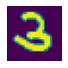

In [16]:
three_tensors=[tensor(Image.open(i)) for i in threes]
seven_tensors=[tensor(Image.open(i)) for i in sevens]
show_image(three_tensors[5])

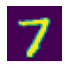

In [17]:
show_image(seven_tensors[45])

tensor stacked

In [19]:
stacked_three=torch.stack(three_tensors).float()/255
stacked_seven=torch.stack(seven_tensors).float()/255
stacked_seven.shape

torch.Size([6265, 28, 28])

In [20]:
stacked_three.shape

torch.Size([6131, 28, 28])

Calculate the average values ​​of 7 and 3

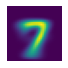

In [21]:
mean7=stacked_seven.mean(0)
show_image(mean7)

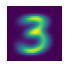

In [22]:
mean3=stacked_three.mean(0)
show_image(mean3)

MAE

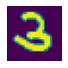

In [32]:
s_3=stacked_three[5]
show_image(s_3)

In [33]:
mae=(s_3-mean3).abs().mean()
mae

tensor(0.1700)

tensor(0.0823)

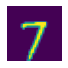

In [37]:
s_7=stacked_seven[5]
show_image(s_7)
mae=(s_7-mean7).abs().mean()
mae